# Supervised Anomaly Detection

Anomaly is an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism.

In this study, will be used supervised methods to create an algorithm that is capable to identify which data are considered anomalies.

Furthermore, cost sensitive learning and adaptive resampling will be implemented to deal with an imbalanced.

After creating the algorithms and dealing with the imbalanced dataset, AdaBoost combined with Decision Tree method will be used to enhance the perfomance of the machine learning algorithm.

## Importation of mlxtend and libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


## Dataset creation
Initially, a synthetic imbalanced dataset will be created so it can be used in futher analysis. It will be composed of 5000 data, with 2 features and 2 classes. 

It will be used 0 on the label to refer as a normal data and 1 when it's an anomaly. About 90% of dataset will be composed by normal data and 10% by anomlies.

In [2]:
features, label = make_classification(n_samples=5000, n_features=2, 
                                      n_informative=2, n_redundant=0, 
                                      n_repeated=0, n_classes=2, 
                                      n_clusters_per_class=1,
                                      weights=[0.90, 0.10], flip_y=0.01,
                                      class_sep=1.5, random_state=42)


In [3]:
df = pd.DataFrame(features, columns=['feature1', 'feature2'])
df['label'] = label

In [4]:
df.head()

,feature1,feature2,label
0,0.083748,-1.924311,0
1,3.161682,-2.016850,0
2,0.601813,-0.447617,0
3,0.379934,-1.622870,0
4,0.246233,-2.249783,0


## Data plotting
To visualize the dataset, it will be plotted: normal data in blue and anomalies in red. As said before, the normal data has the label 0 and the anomalies the label 1.

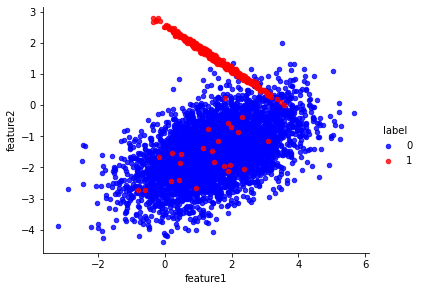

In [5]:
colors = ['blue', 'red']
sns.lmplot('feature1', 'feature2', data=df, hue='label',
           palette=colors, fit_reg=False, scatter_kws={'s': 20})
plt.gcf().set_size_inches(6,4);

## First Part - Decision tree without and with cost sensitive learning
In this first part, the decision tree model will be used without and with the cost sensitive learning. The objective is to show the difference between the results and to analyze then.

## Decision tree model without cost sensitive learning
First, the decision tree classifier is used without the cost sensitive learning. This can be noticed as the "class_weight" equal to "None".

In [69]:
tree_plain = DecisionTreeClassifier(max_depth=1, class_weight=None)
tree_plain_fit = tree_plain.fit(features, label)

## Decision tree plot result
As the decision tree classifier only used 1 as "max_depth" value, it will draw only one line separating two regions to differ the normal data from the anomalies.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


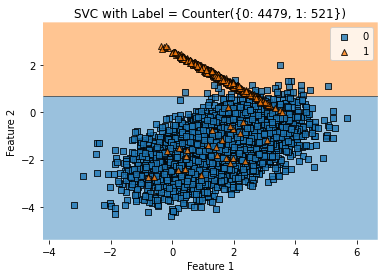

In [70]:
plot_decision_regions(features, label, tree_plain_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

##Result analysis with confusion matrix
As showed below, the algorithm without the cost sensitive learning has an accruracy of 98%. 

The results show a total of 37 false positives, indicating that 37 normal data were considered anomalies. As for the anomalies, 47 were considered normal or false negatives.

In [8]:
cm_tree_plain=confusion_matrix(label, tree_plain.predict(features))
print(cm_tree_plain)
accuracy_tree_plain = accuracy_score(label, tree_plain.predict(features))
print(f'Accuracy: {accuracy_tree_plain}')

[[4442   37]
 [  47  474]]
Accuracy: 0.9832


## Decision tree model with cost sensitive learning
Now, with the intention to increase the accuracy for anomaly detection, it will be used the decision tree model with cost sensitive learning. 

To do it so the "class_weight" will be set to "balanced". By doing this, the weights will be ajusted in a inversely proportional reason to the frequency of the anomalies. In other words, the lower the quantity of anomalies, the higher is the cost of misclassify it.

In [9]:
tree_bal = DecisionTreeClassifier(max_depth=1, class_weight='balanced')
tree_bal_fit = tree_bal.fit(features, label)

## Decision tree plot result
Again, as the decision tree classifier only used 1 as "max_depth" value, it will draw only one line separating two regions to differ the normal data from the anomalies.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


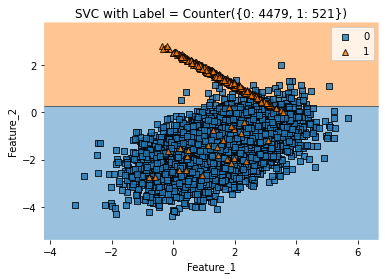

In [10]:
plot_decision_regions(features, label, tree_bal_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

## Result analysis with confusion matrix
The difference between the decision tree model without and with cost sensitive learning is subtle, but it is possible to notice that the line that was drawed moved a little compared to before.

As showed below, the algorithm with the cost sensitive learning has an accruracy of 97,5%. A lower result if compared with the algorithm without the cost sensitive learning.

Besides that, the results show a total of 98 false positives, a worse result.

However, for the anomalies, 27 were considered normal or false negatives. A better result then before.

In [11]:
cm_tree_bal=confusion_matrix(label, tree_bal.predict(features))
print(cm_tree_bal)
accuracy_tree_bal = accuracy_score(label, tree_bal.predict(features))
print(f'Accuracy: {accuracy_tree_bal}')

[[4381   98]
 [  27  494]]
Accuracy: 0.975


##First part conclusion

As the results are compared, it can be noticed that using cost sensitive learning the accuracy changed. Even though the accuracy got lower, from 98% to 97,5%, it's necessary to look to other parameters to understand that the cost sensitive learning was useful and did make the algorithm better.

When anomaly detection is the subject, it's important to realize that it's better having **more false positive** and **less false negative** then otherwise.

False positive will lead to futher analysis while a false negative will be discarded as it seems normal. Therefore, it's better to have a better accuracy on anomalies then on normal data. For example, when dealing with medical issues this can be crucial to verify in a patient desease's features like cancer among others.

## Second Part - Adaptive resampling using SVC

In this second part, the support vector classifier model will be used with the oversampling for the anomalies and the undersampling for the normal data. The objective is to show the difference between the results and to analyze then.

Beside that, the cost of incorrect classification will be implemented so it can be judged which one is better.

##Support vector classifier model
First, the support vector classifier is trained.

In [12]:
clf = SVC().fit(features, label)

##Support vector classifier plot result
The support vector classifier  will draw an area, instead of a line, and everything inside it will be considered as as anomaly.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


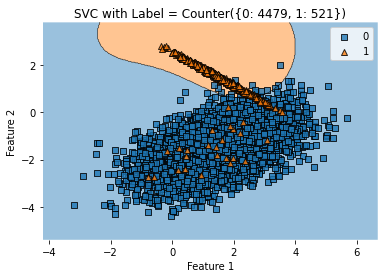

In [13]:
plot_decision_regions(features, label, clf)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

##Result analysis with confusion matrix
As showed below, the algorithm managed to identtify 22 false positives, indicating that 22 normal data were considered anomalies. As for the anomalies, 47 were considered normal or false negatives.

In [14]:
cm=confusion_matrix(label, clf.predict(features))
print(cm)

[[4457   22]
 [  47  474]]


To easier the analysis it's possible to print all true negative, true positive, false negative and false positive.

In [15]:
tn, fp, fn, tp = cm.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
accuracy = accuracy_score(label, clf.predict(features))
print(f'Accuracy: {accuracy}')

True Negative: 4457
False Positive: 22
False Negative: 47
True Positive: 474
Accuracy: 0.9862


## Support vector classifier with oversampling
With the objective of getting a better result, the anomalie's data will be oversampled. By doing so, the fact that the original dataset is unbalanced will have less impact on the algorithm training.

When the synthetic data was created, the dataset had only 10% of anomalies. This time, the anomalies will be increased to a total of 30% of the quantity of normal data.

In [43]:
resample_ratio = 0.3 
sample_normal = tn + fp 
sample_anomaly = int(resample_ratio*(tn+fp))
ros = RandomOverSampler(random_state=0) 
features_resampled, label_resampled = ros.fit_resample(features,label)

In [44]:
print(sample_normal)

4479


In [45]:
print(sample_anomaly)

1343


## Support vector classifier model with oversampling
The SVC algorithm is trained again, but this time with the oversampling feature

In [46]:
clf_ros = SVC().fit(features_resampled, label_resampled)

##SVC plot result with oversampling
The support vector classifier will draw an area and everything inside it will be considered as as anomaly.



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


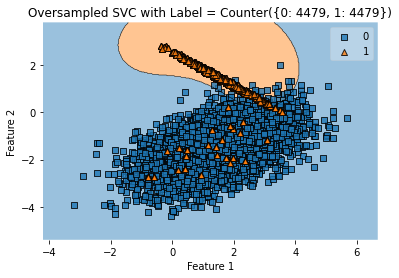

In [47]:
plot_decision_regions(features_resampled, label_resampled, clf_ros)
plt.title(f'Oversampled SVC with Label = {Counter(label_resampled)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.gcf().set_size_inches(6,4)

##Result analysis with confusion matrix
As showed below, the algorithm managed to identtify 67 false positives. As for the anomalies, 27 were considered normal or false negatives.

In [48]:
cm_ros = confusion_matrix(label, clf_ros.predict(features))
cm_ros

array([[4412,   67],
       [  27,  494]])

In [49]:
tn_ros, fp_ros, fn_ros, tp_ros = cm_ros.ravel()
print('After Random Oversampling')
print(f'True Negative: {tn_ros}')
print(f'False Positive: {fp_ros}')
print(f'False Negative: {fn_ros}')
print(f'True Positive: {tp_ros}')
accuracy_ros = accuracy_score(label, clf_ros.predict(features))
print(f'Accuracy: {accuracy}')

After Random Oversampling
True Negative: 4412
False Positive: 67
False Negative: 27
True Positive: 494
Accuracy: 0.9862


##Analysis comparisons
Although the premise remains that it is better to have a higher accuracy about the anomalies, it is important to know the cost of misclassifying the data being analyzed.

With this cost parameter, it can be conclued if it's best to have an oversampling model or not.


##Function of misclassifying cost
The function of misclassifying cost has to consider the costs of false positive and false negative, as well as the number of data tha were miscalssified.

In [53]:
false_pos_cost = 10
false_neg_cost = 100

def misclass_cost(false_pos, false_neg, false_pos_cost, false_neg_cost):
    if(false_pos_cost <= 0  or false_neg_cost <= 0):
        print('Costs must be greater than zero')
        return
    else:
        misclass_cost = (false_pos*false_pos_cost 
                         + false_neg*false_neg_cost)
        return misclass_cost

## Standard x Oversampling SVC analysis
Finally, it can be analysed which method is best for the problem. As showed below, the oversampling method provides a smaller cost then the standard SVC model.

In [54]:
cost_reg = misclass_cost(fp, fn, false_pos_cost, false_neg_cost)
cost_ros = misclass_cost(fp_ros, fn_ros, false_pos_cost, false_neg_cost)
print(f'Without oversampling the cost is: {cost_reg}')
print(f'With random oversampling the cost is: {cost_ros}')
print('')
print(f'Accuracy without oversampling is: {accuracy}')
print(f'Accuracy with random oversampling is: {accuracy_ros}')

Without oversampling the cost is: 4920
With random oversampling the cost is: 3370

Accuracy without oversampling is: 0.9862
Accuracy with random oversampling is: 0.9812


##Support vector classifier with undersampling
If before the anomalies data were oversampled, now the normal data will be undersampled. This is another way of dealing with an unbalanced dataset to train a support vector classifier algorithm.

While in the last case the referential was the normal class as it have more data, in this case the referential will be the anomalie data.

Before, the quantity of the anomalie data was set as a percentage of the normal data and had to be lower then 100% of it. Now, the quantity of the normal data is set as a percentage of the anomalie and it has to be at least 100% of it, which would result in the same number of normal and anomalys data.

In [57]:
resample_ratio_under = 1 # 1 = 100%
sample_anomaly_under = tp + fn 
sample_normal_under = int(resample_ratio_under*sample_anomaly_under)
rus = RandomUnderSampler(random_state=0) 
features_resampled_2, label_resampled_2 = rus.fit_resample(features,label)

In [60]:
print(sample_anomaly_under)

521


In [61]:
print(sample_normal_under)

1042


## Support vector classifier model with undersampling
The SVC algorithm is trained again, but this time with the undersampling feature.

In [62]:
clf_rus = SVC().fit(features_resampled_2, label_resampled_2)

##SVC plot result with undersampling
The support vector classifier will draw an area and everything inside it will be considered as as anomaly.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


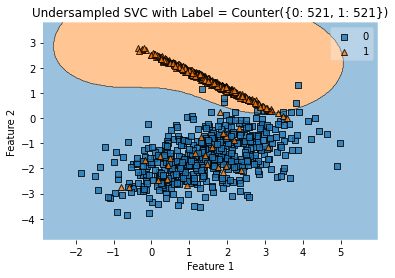

In [63]:
plot_decision_regions(features_resampled_2, label_resampled_2, clf_rus)
plt.title(f'Undersampled SVC with Label = {Counter(label_resampled_2)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.gcf().set_size_inches(6,4)

##Result analysis with confusion matrix
As showed below, the algorithm managed to identtify 91 false positives. As for the anomalies, 27 were considered normal or false negatives.

In terms of cost, the undersamplig method is better then the oversampling despite the lower accuracy.

In [64]:
cm_rus = confusion_matrix(label, clf_rus.predict(features))
print(cm_rus)
accuracy_rus = accuracy_score(label, clf_rus.predict(features))
tn_rus, fp_rus, fn_rus, tp_rus = cm_rus.ravel()
cost_rus = misclass_cost(fp_rus, fn_rus, false_pos_cost, false_neg_cost)
print('')
print(f'With random undersampling the cost is: {cost_rus}')
print(f'Accuracy with random undersampling is: {accuracy_rus}')

[[4388   91]
 [  27  494]]

With random undersampling the cost is: 3610
Accuracy with random undersampling is: 0.9764


##Second part conclusion

Even with an unbalanced dataset, it was possible to use support vector classifier to build a model that is capable of detecting the anomalys.

Using oversampling and undersampling it was feasible to deal with the low quantity of anomalys presented in the dataset.

To determine which method is best, it was also implemented a missclassifying cost function that helped the analysis and to conclud which one to choose.

## Third Part - AdaBoost
For the 3° and last part it will be presented the adaptive boosting technique to enhance the performance of the decision tree model that was presented in the first part of this study.

Adaptive boosting works better in weak learners and is usually used combined with decision tree stumps.

## Decision tree model with AdaBoost
First, the decision tree classifier is modeled with the AdaBoost.

In [66]:
bdtree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, 
                                                   class_weight=None),
                            n_estimators=100)
bdtree_fit = bdtree.fit(features, label)

## Decision tree with AdaBoost plot result
This time despite the "max_depth" value equal to "1", it can be noticed that the plot will have more then just one line as in the first part of this study. This happens because of the AdaBoost Classifier.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


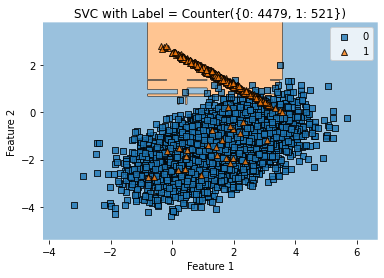

In [29]:
plot_decision_regions(features, label, bdtree_fit)
plt.title(f'SVC with Label = {Counter(label)}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.gcf().set_size_inches(6,4)

##Result analysis with confusion matrix
As showed below, the algorithm with AdaBoost has an accruracy of 98,76%. 

The results show a total of 19 false positives, while for the anomalies, 43 were considered normal or false negatives.

In [30]:
cm_bdtree=confusion_matrix(label, bdtree.predict(features))
print(cm_bdtree)
accuracy_bdtree = accuracy_score(label, bdtree.predict(features))
print(f'Accuracy: {accuracy_bdtree}')

[[4460   19]
 [  43  478]]
Accuracy: 0.9876


##Retrieving the results from the first part
To compare the results with and without the AdaBoost, it will be printed again the results from the first part of this study.

In [71]:
print(cm_tree_plain)
print(f'Accuracy: {accuracy_tree_plain}')

[[4442   37]
 [  47  474]]
Accuracy: 0.9832


##Third part conclusion

Using AdaBoost it was possible to enchance the results from the decision tree model. The accuracy is higher and the false negative are lower if compared to the first part.

While in the first part the accuracy was 98,32% and the false negatives had a quantity of 47, in this third part the accuracy rose to 98,76% and the false negatives quantity fallen to 43.